In [1]:
# Quick attempt at german credit dataset.
# Imports
import numpy as np
import pandas as pd
import scorecardpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('germancredit.csv')

In [3]:
df.head()

,Default,checkingstatus1,duration,history,purpose,amount,savings,employ,installment,status,...,residence,property,age,otherplans,housing,cards,job,liable,tele,foreign
0,0,A11,6,A34,A43,1169,A65,A75,4,A93,...,4,A121,67,A143,A152,2,A173,1,A192,A201
1,1,A12,48,A32,A43,5951,A61,A73,2,A92,...,2,A121,22,A143,A152,1,A173,1,A191,A201
2,0,A14,12,A34,A46,2096,A61,A74,2,A93,...,3,A121,49,A143,A152,1,A172,2,A191,A201
3,0,A11,42,A32,A42,7882,A61,A74,2,A93,...,4,A122,45,A143,A153,1,A173,2,A191,A201
4,1,A11,24,A33,A40,4870,A61,A73,3,A93,...,4,A124,53,A143,A153,2,A173,2,A191,A201


In [4]:
df.info()
# 8 Numerical Columns
# 13 Categorical Columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
Default            1000 non-null int64
checkingstatus1    1000 non-null object
duration           1000 non-null int64
history            1000 non-null object
purpose            1000 non-null object
amount             1000 non-null int64
savings            1000 non-null object
employ             1000 non-null object
installment        1000 non-null int64
status             1000 non-null object
others             1000 non-null object
residence          1000 non-null int64
property           1000 non-null object
age                1000 non-null int64
otherplans         1000 non-null object
housing            1000 non-null object
cards              1000 non-null int64
job                1000 non-null object
liable             1000 non-null int64
tele               1000 non-null object
foreign            1000 non-null object
dtypes: int64(8), object(13)
memory usage: 164.2+ KB


In [5]:
df.describe()

,Default,duration,amount,installment,residence,age,cards,liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
sns.set_style('darkgrid')
total = float(len(df))
def with_hue(plot, feature, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    category_labels = feature.unique()
    Number_of_categories = len(category_labels)
    k = 0
    for i in category_labels:
        total = feature.value_counts()[i]
        for j in range(hue_categories):
            percentage = 100 * a[(j*Number_of_categories + k)] / total
            x = patch[(j*Number_of_categories + k)].get_x() + patch[(j*Number_of_categories + k)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + k)].get_y() + patch[(j*Number_of_categories + k)].get_height() 
            ax.text(
                (patch[(j*Number_of_categories + k)].get_x() 
                 + patch[(j*Number_of_categories + k)].get_width()),
                patch[(j*Number_of_categories + k)].get_height() + 3,
                '{:.1f}%'.format(percentage),
                ha='right'
            )
        k += 1
    plt.show()

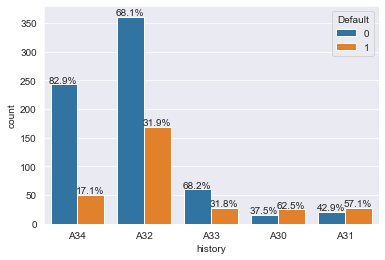

In [7]:
ax = sns.countplot(x="history", hue="Default", data=df) 
with_hue(ax, df.history, 2)
# Split changes quite a bit depending on the category
# Indicates this could be a signifcant variable

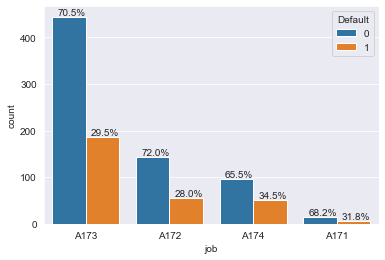

In [8]:
ax = sns.countplot(x='job', hue='Default', data=df)
with_hue(ax, df.job, 2)
# Split stays relatively the same across all categories
# Indicates that this might be an insignifcant variable

In [9]:
bins = sc.woebin(df, 'Default')

[INFO] creating woe binning ...
Binning on 1000 rows and 21 columns in 00:00:10


In [10]:
for k, bin_ in bins.items():
    print(k)
    print(bin_[['woe', 'bin_iv','total_iv']])
    
# total iv for history: 0.29183
# total iv for job: 0.008484
# Further backs up the observations from the plots above

checkingstatus1
        woe    bin_iv  total_iv
0 -1.176263  0.404410  0.639372
1 -0.405465  0.009461  0.639372
2  0.614204  0.225501  0.639372
purpose
        woe    bin_iv  total_iv
0 -0.805625  0.059846  0.152924
1 -0.410063  0.042959  0.152924
2  0.279920  0.050119  0.152924
age
        woe    bin_iv  total_iv
0  0.528844  0.057921  0.130499
1 -0.160930  0.002529  0.130499
2  0.142455  0.005359  0.130499
3 -0.872488  0.048610  0.130499
4 -0.212371  0.016080  0.130499
otherplans
        woe    bin_iv  total_iv
0 -0.121179  0.011656  0.057592
1  0.477551  0.045936  0.057592
others
        woe    bin_iv  total_iv
0 -0.587787  0.015674   0.01642
1  0.027974  0.000746   0.01642
residence
        woe        bin_iv  total_iv
0 -0.112478  1.606828e-03  0.003589
1  0.070151  1.536634e-03  0.003589
2 -0.054941  4.447614e-04  0.003589
3  0.001153  5.489228e-07  0.003589
cards
        woe    bin_iv  total_iv
0  0.074877  0.003601  0.010084
1 -0.134781  0.006482  0.010084
status
        woe    

In [11]:
# split into train and test set
train, test = sc.split_df(df, 'Default').values()

In [12]:
# Convert values into woe
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [13]:
y_train = train_woe.loc[:,'Default']
X_train = train_woe.loc[:,train_woe.columns != 'Default']
y_test = test_woe.loc[:,'Default']
X_test = test_woe.loc[:,train_woe.columns != 'Default']

In [14]:
# Fit logit model
lr = sm.GLM(y_train, X_train, family=sm.families.Binomial())
fit = lr.fit()

In [15]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      681
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -358.05
Date:                Fri, 10 Jul 2020   Deviance:                       716.10
Time:                        12:28:14   Pearson chi2:                     685.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
purpose_woe             0.9676      0.237      4.081      0.000       0.503       1.432
status_woe              1.2771      0.467      2.732      0.006       0.361       2.193
employ_woe              0.2038      0.329      0.620      0.535      -0.440       0.848
duration_woe            0.6033      0.197      3.057      0.002       0.216       0.990
job_woe                 0.5408      1.158      0.467      0.641      -1.729       2.811
foreign_woe          6.365e-14   5.95e-14      1.069      0.285   -5.31e-14     1.8e-13
savings_woe             0.6396      0.213      3.003      0.003       0.222       1.057
liable_woe            -15.8803     14.494     -1.096      0.273     -44.287      12.527
checkingstatus1_woe     0.7751      0.115      6.742      0.000       0.550       1.000
age_woe                 0.7533      0.270      2.792      0.005       0.224       1.282
otherplans_woe          1.0344      0.409      2.530      0.011       0.233       1.836
others_woe              1.5022      0.728      2.063      0.039       0.075       2.930
residence_woe           2.7278      1.572      1.735      0.083      -0.354       5.810
cards_woe              -0.3059      0.993     -0.308      0.758      -2.252       1.640
housing_woe             0.5134      0.359      1.430      0.153      -0.190       1.217
installment_woe         2.5134      0.620      4.053      0.000       1.298       3.729
amount_woe              1.0620      0.254      4.184      0.000       0.564       1.560
property_woe            0.3682      0.329      1.120      0.263      -0.276       1.012
tele_woe                2.9058      1.309      2.220      0.026       0.340       5.471
history_woe             0.6542      0.190      3.448      0.001       0.282       1.026
=======================================================================================
"""

In [16]:
# Get probabilities
train_pred = fit.predict(X_train)
test_pred = fit.predict(X_test)

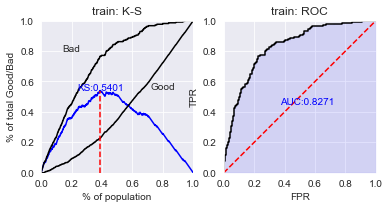

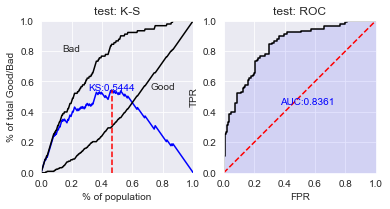

In [17]:
# Plot diagnositcs
train_perf = sc.perf_eva(y_train, train_pred, title = "train")
test_perf = sc.perf_eva(y_test, test_pred, title = "test")

In [18]:
# Try a subset of iv values > 0.1
for k, bin_ in bins.items():
    if bin_.total_iv[0] > 0.1:
        print(k)

checkingstatus1
purpose
age
amount
duration
property
history
savings


In [19]:
# 8 cols vs 20
cols = [
    'Default', 'property', 'age', 'amount', 'purpose', 'checkingstatus1', 
    'history', 'duration', 'savings'
]

df_new = df[cols]

In [20]:
# split into train and test set
train_new, test_new = sc.split_df(df_new, 'Default').values()
# Convert values into woe
train_woe_new = sc.woebin_ply(train_new, bins)
test_woe_new = sc.woebin_ply(test_new, bins)
y_train_new = train_woe_new.loc[:,'Default']
X_train_new = train_woe_new.loc[:,train_woe_new.columns != 'Default']
y_test_new = test_woe_new.loc[:,'Default']
X_test_new = test_woe_new.loc[:,test_woe_new.columns != 'Default']
# Fit logit model
lr_new = sm.GLM(y_train_new, X_train_new, family=sm.families.Binomial())
fit_new = lr_new.fit()

[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [21]:
fit_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                  700
Model:                            GLM   Df Residuals:                      692
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -378.71
Date:                Fri, 10 Jul 2020   Deviance:                       757.43
Time:                        12:28:17   Pearson chi2:                     706.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
checkingstatus1_woe     0.7207      0.108      6.663      0.000       0.509       0.933
purpose_woe             1.0066      0.224      4.492      0.000       0.567       1.446
age_woe                 0.8866      0.251      3.538      0.000       0.396       1.378
property_woe            0.5916      0.279      2.117      0.034       0.044       1.139
amount_woe              0.7583      0.236      3.212      0.001       0.296       1.221
duration_woe            0.6725      0.186      3.613      0.000       0.308       1.037
history_woe             0.6961      0.171      4.061      0.000       0.360       1.032
savings_woe             0.5553      0.202      2.755      0.006       0.160       0.950
=======================================================================================
"""

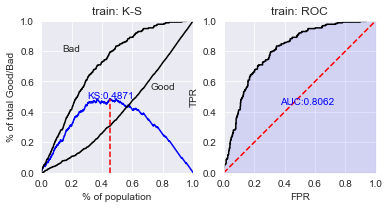

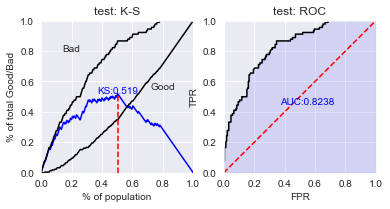

In [22]:
# Get probabilities
train_pred_new = fit_new.predict(X_train_new)
test_pred_new = fit_new.predict(X_test_new)
# Plot diagnositcs
train_perf_new = sc.perf_eva(y_train_new, train_pred_new, title = "train")
test_perf_new = sc.perf_eva(y_test_new, test_pred_new, title = "test")

In [23]:
# AUC and K-S is lower in the smaller model but only slightly.
# Going to calculate AIC 
# Get log-likelihood of each

ll_ = fit.llf
ll_new = fit_new.llf

In [24]:
AIC = -2*(ll_) + 2*20
AIC_new = -2*(ll_new) + 2*8

In [25]:
print("AIC: " + str(AIC))
print("AIC_new: " + str(AIC_new))
# AIC for the larger models suggests it is the "better fit" over the subset

AIC: 756.1013021832739
AIC_new: 773.4268371173923
